In [1]:
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '..')

# for saving
import os

from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt

from src import setup
# setup.use_gpu()

In [2]:
from src import ( 
    measurements as measure,
    density_matrix as DM,
    simulation as sim,
    orders,
    order_rules,
    random_unitary,
    simulation)

from Scripts import simulation_CLI as cleo

In [3]:
Trials = 5

In [4]:
for unitary_seed in range(Trials):
    initial_pops = [.02,0.02, .02, .02, .499, .02, .02, .02]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "greedy"
    num_steps = 50
    data = cleo.execute(file_name="greedy",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_0-order_rule_name_greedy
90%
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy
simulation complete, extracting and saving data to : ../data/greedy/greedy-8_qubits-c5_connectivity-unitary_energy_subspace_1-unitary_seed_1-order_rule_name_greedy
90%
simu

In [5]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/greedy")

In [ ]:
for unitary_seed in range(5):
    initial_pops = [.02,0.02, .02, .02, .499, .02, .02, .02]
    system = DM.n_thermal_qbits(initial_pops)
    connectivity = "c5"
    unitary_energy_subspace = 1
    ordering_seed = 1
    chunk_size = 2
    order_rule_name = "random"
    num_steps = 50
    data = cleo.execute(file_name="random",
                       connectivity=connectivity,
                       order_rule_name = order_rule_name, 
                       unitary_seed=unitary_seed,
                       unitary_energy_subspace=unitary_energy_subspace,
                       evolution_generation_type="unitary",
                       chunk_size=chunk_size,
                       num_steps=num_steps,
                       initial_pops=initial_pops,
                       verbosity = .9)

In [ ]:
import sys as SYS; SYS.path.insert(0, '../..')
from Scripts import hdf5merge
hdf5merge.merge_hdf5_files("../data/random")

In [6]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
# Add directory above current directory to path
import sys as SYS; SYS.path.insert(0, '../..')
import h5py
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from src import ket as ket
from src import density_matrix as DM

In [7]:
newdata1 = dict(h5py.File("../data/greedy/greedy.hdf5"))

In [ ]:
newdata2 =  dict(h5py.File("../data/therm/therm.hdf5"))

In [8]:
def get_pops(data, n_qubits, connectivity,update_rule):
    #dimension 0 is each trial
    #dimension 1 is each time step
    #dimension 2 is each qubit
    result = []
    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['pops'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        dat = np.array([np.array([dat[k][subkey][()] for subkey in sorted(dat[k])]) for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_2_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(2)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit pair
    #dimension 3 and 4 is the 2 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['two_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

def get_3_qbit_dms(data, n_qubits, connectivity,update_rule):
    basis = ket.canonical_basis(3)
    #dimension 0 is each trial
    #dimension 1 is each time step (recall that sampling step is 5 by default)
    #dimension 2 is qubit triplet
    #dimension 3 and 4 is the 3 qubit density matrix
    result = []
    
    def to_tuple(string):
        tuple_elements = string.strip('()').split(',')
        return tuple(int(elem.strip()) for elem in tuple_elements)

    for trial in data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1']:
        seed = trial.split(' ')[-1]
        dat = dict(data[f'{n_qubits} qubits'][f'{connectivity} connectivity']['unitary energy subspace 1'][f'unitary seed {seed}'][f'ordering seed {update_rule}']['three_qubit_dms'])
        dat = {int(k.split('(')[0]): dat[k] for k in dat}
        
        dat = np.array([{to_tuple(subkey):DM.DensityMatrix(dat[k][subkey],basis) for subkey in sorted(dat[k])} for k in sorted(dat)])
        result.append(dat)
    return(np.array(result))

In [9]:
twoQdmsgreedy = get_2_qbit_dms(newdata1,8,"c5","greedy")

In [ ]:
#How to view the matrix
twoQdmsgreedy[3][5][(2,3)].data.toarray()

In [ ]:
twoQdmsrandom = get_2_qbit_dms(newdata_mmi_random,8,"c5","random")

In [ ]:
twoQdmsgreedy[2]

In [ ]:
popsrandom = get_pops(newdata_mmi_random,8,"c5","random")

In [ ]:
for i in range(5):
    plt.imshow(popsrandom[i], interpolation='none')
    plt.show()

In [11]:
popsgreedy = get_pops(newdata1,8,"c5","greedy")

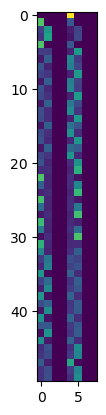

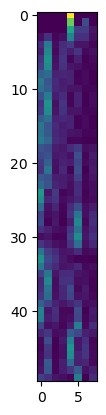

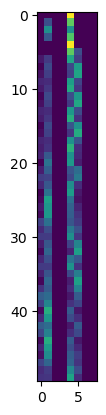

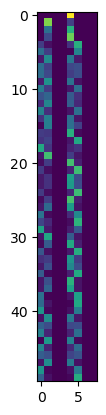

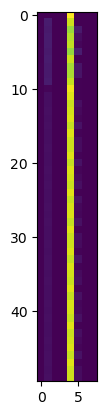

In [159]:
for i in range(5):
    plt.imshow(popsgreedy[i], interpolation='none')
    plt.show()

In [13]:
three_q_dms_greedy = get_3_qbit_dms(newdata1,8,"c5","greedy")

In [ ]:
three_q_dms_greedy[3][5][(2,3,4)].data.toarray()

In [ ]:
#How to view the matrix
three_q_dms_random = get_3_qbit_dms(newdata_mmi_random,8,"c5","random")

In [175]:
#MI of every pair
def mutual_info_dicts(twoQdms, trial_index):
    mutual_info_list = []
    for time_step in twoQdms[trial_index]:
        mutual_info_dict = {}
        mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-6 else 0 for k, v in mutual_info.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        mutual_info_dict.update(filtered_mutual_info)
        # Append the mutual_info_dict to the list
        mutual_info_list.append(mutual_info_dict)
    return mutual_info_list

In [176]:
mutual_info_dicts(twoQdmsgreedy,1)

[{(0, 1): 0,
  (0, 2): 0,
  (0, 3): 0,
  (0, 4): 0,
  (0, 5): 0,
  (0, 6): 0,
  (0, 7): 0,
  (1, 2): 0,
  (1, 3): 0,
  (1, 4): 0,
  (1, 5): 0,
  (1, 6): 0,
  (1, 7): 0,
  (2, 3): 0,
  (2, 4): 0,
  (2, 5): 0,
  (2, 6): 0,
  (2, 7): 0,
  (3, 4): 0,
  (3, 5): 0,
  (3, 6): 0,
  (3, 7): 0,
  (4, 5): 0,
  (4, 6): 0,
  (4, 7): 0,
  (5, 6): 0,
  (5, 7): 0,
  (6, 7): 0},
 {(0, 1): 0,
  (0, 2): 0,
  (0, 3): 0,
  (0, 4): 0,
  (0, 5): 0,
  (0, 6): 0,
  (0, 7): 0,
  (1, 2): 0,
  (1, 3): 0,
  (1, 4): 0,
  (1, 5): 0,
  (1, 6): 0,
  (1, 7): 0,
  (2, 3): 0,
  (2, 4): 0,
  (2, 5): 0,
  (2, 6): 0,
  (2, 7): 0,
  (3, 4): 0,
  (3, 5): 0,
  (3, 6): 0,
  (3, 7): 0,
  (4, 5): 0,
  (4, 6): 0.265707834479299,
  (4, 7): 0,
  (5, 6): 0,
  (5, 7): 0,
  (6, 7): 0},
 {(0, 1): 0,
  (0, 2): 0,
  (0, 3): 0,
  (0, 4): 0,
  (0, 5): 0,
  (0, 6): 0,
  (0, 7): 0,
  (1, 2): 0,
  (1, 3): 0,
  (1, 4): 0,
  (1, 5): 0,
  (1, 6): 0,
  (1, 7): 0,
  (2, 3): 0,
  (2, 4): 0,
  (2, 5): 0,
  (2, 6): 0,
  (2, 7): 0,
  (3, 4): 0,
  (3, 5

In [18]:
#MMI between all triplets
def MMI_dict(three_q_dms, trial_index): 
    for time_step in three_q_dms[trial_index]:
        mmi = measure.monogamy_of_mutual_information_of_every_triplet_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mmi = {k: v if v >= 1e-8 else 0 for k, v in mmi.items()}
        print(mmi)

In [ ]:
#MMI dicts of every pair
def MMI_dicts(threeQdms, trial_index):
    MMI_list = []
    for time_step in threeQdms[trial_index]:
       MMI_dict = {}
        MMI = measure.monogamy_of_mutual_information_of_every_triplet_dict(time_step)
        # Filter out values below the precision threshold
        filtered_MMI = {k: v if v >= 1e-8 else 0 for k, v in MMI.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        MMI_dict.update(filtered_MMI)
        # Append the mutual_info_dict to the list
        MMI_list.append(MMI_dict)
    return MMI_list

In [19]:
#SSA between all triplets
def SSA_dict(three_q_dms, trial_index):
    for time_step in three_q_dms[trial_index]:
        ssa = measure.strong_subaddativity_of_every_triplet_dict(time_step)
        # Filter out values below the precision threshold
        filtered_mutual_info = {k: v if v >= 1e-8 else 0 for k, v in ssa.items()}
        print(ssa)

In [ ]:
#concurrence dicts of every pair
def SSA_dicts(threeQdms, trial_index):
   SSA_list = []
    for time_step in threeQdms[trial_index]:
      SSA_dict = {}
        SSA = measure.strong_subaddativity_of_every_triplet_dict(time_step)
        # Filter out values below the precision threshold
        filtered_SSA = {k: v if v >= 1e-8 else 0 for k, v in SSA.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        SSA_dict.update(filtered_SSA)
        # Append the mutual_info_dict to the list
        SSA_list.append(SSA_dict)
    return SSA_list

In [20]:
#Concurrence between all pairs
def concurrence_dict(twoQdms, trial_index):
    for time_step in twoQdms[trial_index]:
        conc = measure.concurrence_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_conc = {k: v if v > 0 else 0 for k, v in conc.items()}
        print(filtered_conc)

In [107]:
#concurrence dicts of every pair
def concurrence_dicts(twoQdms, trial_index):
    concurrence_list = []
    for time_step in twoQdms[trial_index]:
        concurrence_dict = {}
        concurrence = measure.concurrence_of_every_pair_dict(time_step)
        # Filter out values below the precision threshold
        filtered_concurrence = {k: v if v >= 1e-8 else 0 for k, v in concurrence.items()}
        # Update the mutual_info_dict with the filtered mutual info for the current time step
        concurrence_dict.update(filtered_concurrence)
        # Append the mutual_info_dict to the list
        concurrence_list.append(concurrence_dict)
    return concurrence_list

In [177]:
#MI between any two qubit as a function of time
import matplotlib.pyplot as plt

# Initialize lists to store time steps and corresponding values for (4, 5)
time_steps = []
values_45 = []

# Loop through each time_step in the sim_index
for time_step_idx, time_step in enumerate(twoQdmsgreedy[6]):
    mutual_info = measure.mutual_information_of_every_pair_dict(time_step)
    # Filter out values below the precision threshold
    filtered_mutual_info = {k: v if v >= 1e-8 else 0 for k, v in mutual_info.items()}
    
    # Get the value for the specific key pair (4, 5)
    value_45 = filtered_mutual_info.get((4, 5), 0)
    
    # Append the time step and value to the lists
    time_steps.append(time_step_idx)
    values_45.append(value_45)

# Plot the values on an x-y plot
plt.figure(figsize=(10, 6))
plt.plot(time_steps, values_45, marker='o', linestyle='-', color='b')
plt.xlabel('Time Step')
plt.ylabel('Mutual Information for (4, 5)')
plt.title('Mutual Information for Key (4, 5) Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

IndexError: index 6 is out of bounds for axis 0 with size 5

In [ ]:
#Concurrence between any two-qubit as a function of time
import matplotlib.pyplot as plt

# Initialize lists to store time steps and corresponding values for (4, 5)
time_steps = []
values_45 = []

# Loop through each time_step in the sim_index
for time_step_idx, time_step in enumerate(twoQdmsgreedy[6]):
    conc = measure.concurrence_of_every_pair_dict(time_step)
    # Filter out values below the precision threshold
    filtered_conc = {k: v if v >= 1e-8 else 0 for k, v in conc.items()}
    
    # Get the value for the specific key pair (4, 5)
    value_45 = conc.get((4, 5), 0)
    
    # Append the time step and value to the lists
    time_steps.append(time_step_idx)
    values_45.append(value_45)

# Plot the values on an x-y plot
plt.figure(figsize=(10, 6))
plt.plot(time_steps, values_45, marker='o', linestyle='-', color='b')
plt.xlabel('Time Step')
plt.ylabel('Concurrence for (4, 5)')
plt.title('Concurrence for Key (4, 5) Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#MMI for any triplet as a function of time
import matplotlib.pyplot as plt

# Initialize lists to store time steps and corresponding values for (4, 5)
time_steps = []
values_123 = []

# Loop through each time_step in the sim_index
for time_step_idx, time_step in enumerate(three_q_dms_greedy[3]):
    mmi = measure.monogamy_of_mutual_information_of_every_triplet_dict(time_step)
    
    # Get the value for the specific key pair (4, 5)
    value_123 = mmi.get((4, 8, 0), 0)
    
    # Append the time step and value to the lists
    time_steps.append(time_step_idx)
    values_123.append(value_123)

# Plot the values on an x-y plot
plt.figure(figsize=(10, 6))
plt.plot(time_steps, values_123, marker='o', linestyle='-', color='b')
plt.xlabel('Time Step')
plt.ylabel('MMI for (1, 2, 3)')
plt.title('MMI for Key (1,2,3) Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [68]:
#Adjacency matrix of MI
def create_adjacency_matrix(mutual_info_dict, num_nodes):
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for (node1, node2), mutual_info_value in mutual_info_dict.items():
        adjacency_matrix[node1][node2] = mutual_info_value
        adjacency_matrix[node2][node1] = mutual_info_value  # Assuming undirected graph
    return adjacency_matrix


In [101]:
# Call the two_point_dict function for each trial index
# Get the list of dictionaries containing two point values for each time step
def create_adjacency_matrix_two_dim(two_point_dict, num_nodes):
    adjacency_matrix = [[0] * num_nodes for _ in range(num_nodes)]
    for (node1, node2), two_point_value in two_point_dict.items():
        adjacency_matrix[node1][node2] = two_point_value
        adjacency_matrix[node2][node1] = two_point_value  # Assuming undirected graph
    return adjacency_matrix


In [111]:
def adjacency_matrices_list_two_dim(twoQdms, trial_index, num_nodes, two_point_dicts):
    # Get the list of dictionaries containing mutual information values for each time step
    two_point_dicts_list = two_point_dicts(twoQdms, trial_index)
    # Create adjacency matrices for each time step
    adjacency_matrices = []
    for two_point_dict in two_point_dicts_list:
        adj_matrix = create_adjacency_matrix(two_point_dict, num_nodes)
        adjacency_matrices.append(adj_matrix)
    return adjacency_matrices

In [252]:
# Example usage:
# Assuming num_nodes is known
num_nodes = 8  # Update this with the actual number of nodes
# Get the list of adjacency matrices
adj_matrices_list = adjacency_matrices_list_two_dim(twoQdmsgreedy,1, num_nodes,mutual_info_dicts)
#adj_matrices_list

In [179]:
def average_values_two_point_list(adj_matrices_list):
    average_values_two_point_list=[]
    for adj_matrix in adj_matrices_list:
        adj_matrix_form = np.matrix(adj_matrix)
        average_values_two_point = adj_matrix_form.sum(axis=1)
        average_values_two_point=np.array(average_values_two_point).flatten()
        average_values_two_point=np.real(average_values_two_point)
        average_values_two_point_list.append(average_values_two_point)
    return average_values_two_point_list

In [184]:
average_mi_in_time_per_qubit=average_values_two_point_list(adj_matrices_list)

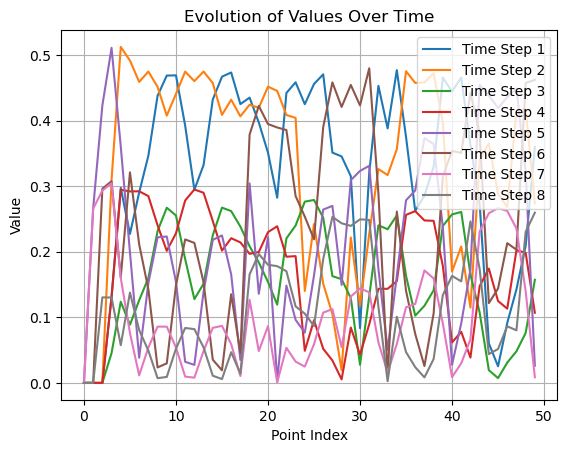

In [185]:
# Example list of arrays (replace this with your actual list of arrays)
list_of_arrays = [[1, 2, 3, 4, 5, 6, 7, 8], [2, 3, 4, 5, 6, 7, 8, 9], [3, 4, 5, 6, 7, 8, 9, 10]]  # Example data

# Transpose the list of arrays so that each row corresponds to a time step
array_matrix = np.array(average_mi_in_time_per_qubit).T

# Plot each row (corresponding to a time step) separately
for i, row in enumerate(array_matrix):
    plt.plot(row, label=f'Time Step {i+1}')

# Add labels and legend
plt.xlabel('Point Index')
plt.ylabel('Value')
plt.title('Evolution of Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

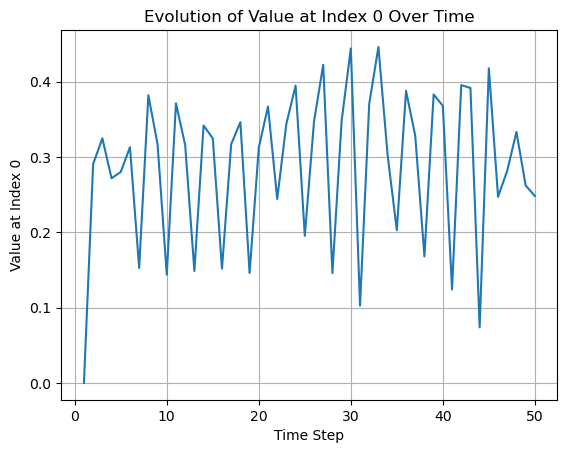

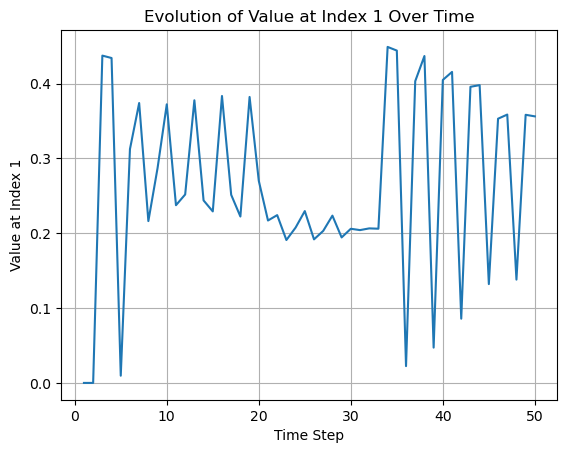

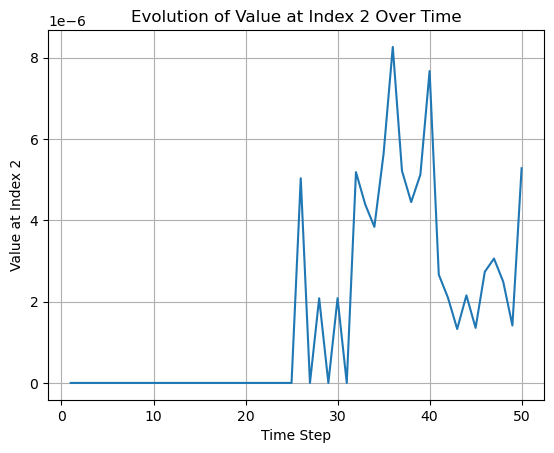

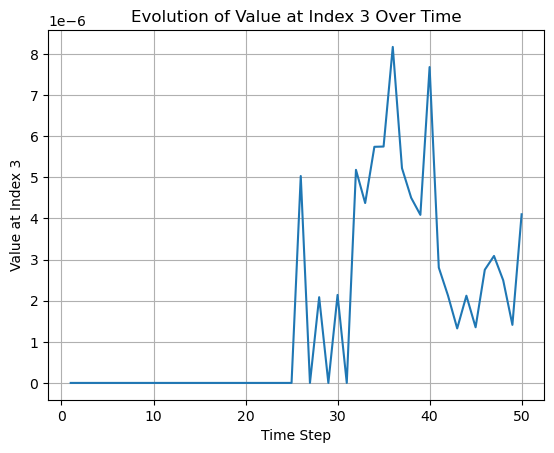

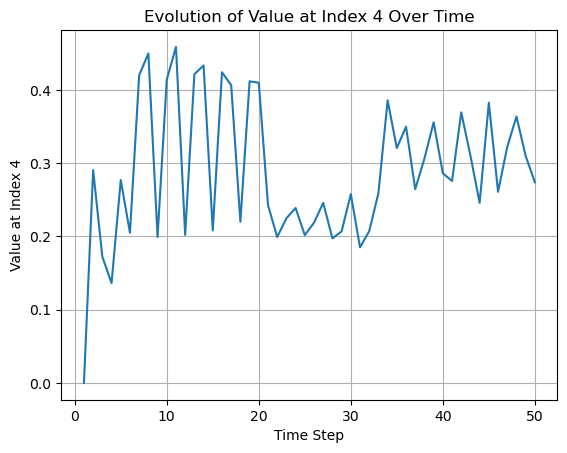

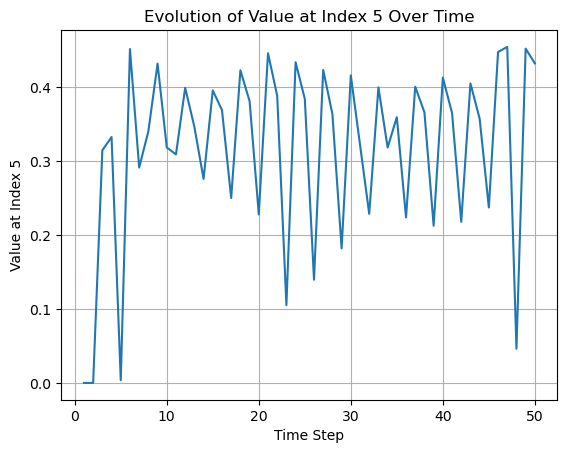

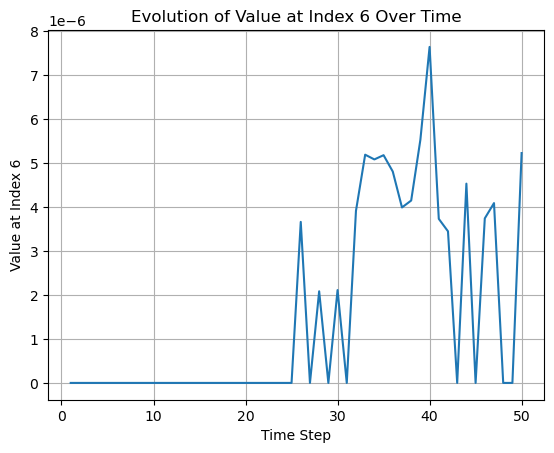

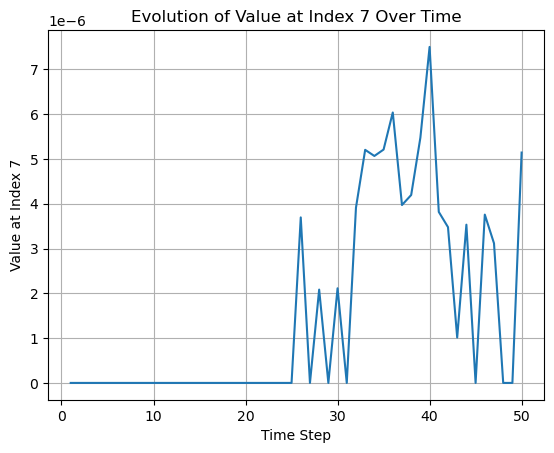

In [182]:
#Rank three tensor for MMI# Example list of arrays (replace this with your actual list of arrays)
list_of_arrays =average_mi_in_time_per_qubit  # Example data

# Iterate over each value in the array
for i in range(len(list_of_arrays[0])):
    # Create a separate plot for each value
    plt.figure()
    plt.plot(range(1, len(list_of_arrays) + 1), [array[i] for array in list_of_arrays])
    plt.xlabel('Time Step')
    plt.ylabel(f'Value at Index {i}')
    plt.title(f'Evolution of Value at Index {i} Over Time')
    plt.grid(True)

plt.show()

In [195]:
# generate exractable work and change in extractable work data for greedy
sizes = [8]
connectivities = ["c5"]
temps = ['cold','hot']
result = {s:{t:{} for t in temps} for s in sizes}
for size in sizes:
    for connectivity in connectivities:
        pops = get_pops(newdata1,size,connectivity,"greedy")
        extractable_work = np.array([[measure.extractable_work_of_each_qubit_from_pops(p) for p in time_slice ]for time_slice in pops ])
        change_in_ex_work = np.diff(extractable_work,axis = 1)

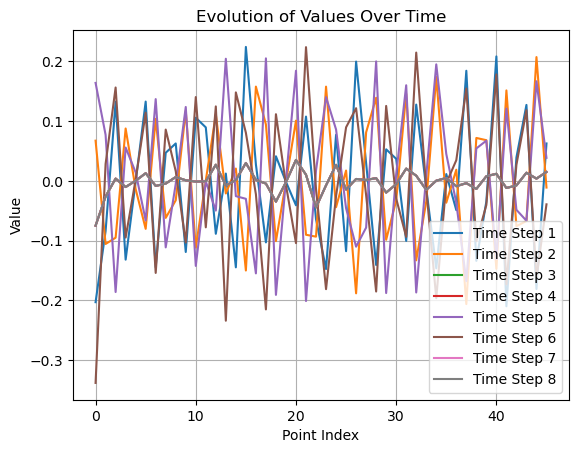

In [247]:
array_matrix = np.array(change_in_ex_work[3]).T
# Plot each row (corresponding to a time step) separately
for i, row in enumerate(array_matrix[::,3::]):
    plt.plot(row, label=f'Time Step {i+1}')

# Add labels and legend
plt.xlabel('Point Index')
plt.ylabel('Value')
plt.title('Evolution of Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

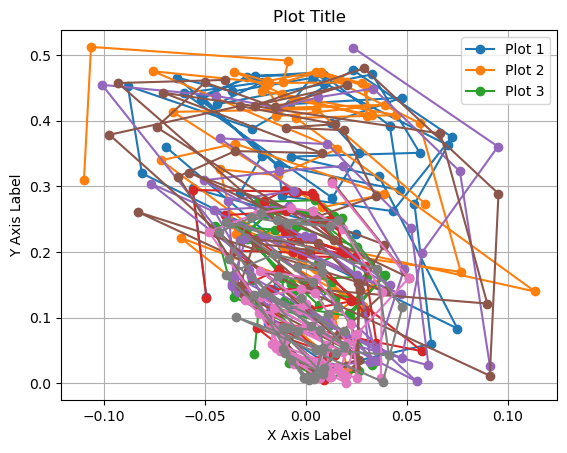

In [251]:
# Assuming you have two lists of arrays
array_matrix1 = np.array(change_in_ex_work[1]).T
array_1=array_matrix1[::,2::]
array_matrix2 = np.array(average_mi_in_time_per_qubit).T
array_2=array_matrix2[::,3::]

# Iterate over each pair of arrays and create plots
for x, y in zip(array_1, array_2):
    plt.plot(x, y, marker='o', linestyle='-')

plt.xlabel('X Axis Label')
plt.ylabel('Y Axis Label')
plt.title('Plot Title')
plt.grid(True)
plt.legend(['Plot 1', 'Plot 2', 'Plot 3'])  # You can customize the legend according to your data
plt.show()